## Data loading

In [1]:
import pandas as pd
chronos = pd.read_csv("../data/CRISPR_gene_effect.csv",index_col=0).dropna()
chronos.columns = [g.split()[0] for g in chronos.columns]

In [2]:
cp = pd.read_csv("../data/CopyNumber.csv",index_col=0)
cp.columns = [g.split()[0]+'_cp' for g in cp.columns]

In [3]:
mut = pd.read_csv("../data/Damaging_mutation.csv",index_col=0)
mut.columns = [g.split()[0]+'_mut' for g in mut.columns]

## Histgrams (Figs. 1B, 1E, s2c, and s2d)

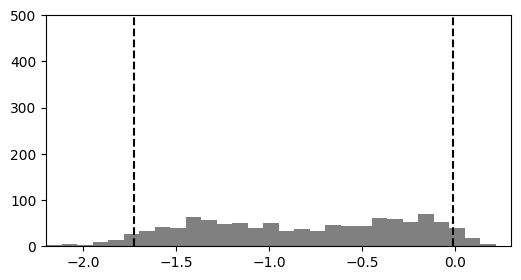

In [4]:
# Figure 1B
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,3))
bins = np.linspace(-2.2,0.3, 31)
gene="CCND1"
plt.hist(chronos[gene], bins=bins, color="gray")
plt.xlim(-2.2, 0.3)
plt.ylim(0, 500)

lower_5th = np.percentile(chronos[gene], 5)
upper_95th = np.percentile(chronos[gene], 95)
plt.axvline(lower_5th, color="black", linestyle="--")
plt.axvline(upper_95th, color="black", linestyle="--")
plt.show()

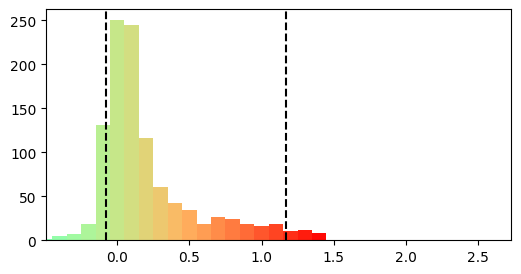

In [5]:
#Figure 1E
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
gene = "TP53"
sns.reset_defaults()

hist_values, bin_edges = np.histogram(chronos[gene], bins=40, range=(-2.5, 1.5))
norm = plt.Normalize(-2.5, 1.5)
cmap = cm.rainbow
plt.figure(figsize=(6, 3))
for i in range(len(bin_edges) - 1):
    plt.bar(
        bin_edges[i],  # xの位置
        hist_values[i],  # 高さ
        width=bin_edges[i + 1] - bin_edges[i],  # ビン幅
        color=cmap(norm((bin_edges[i] + bin_edges[i + 1]) / 2))  # 色付け
    )
lower_5th = np.percentile(chronos[gene], 5)
upper_95th = np.percentile(chronos[gene], 95)
plt.axvline(lower_5th, color="black", linestyle="--")
plt.axvline(upper_95th, color="black", linestyle="--")
plt.xlim((min(chronos[gene]),max(chronos[gene])))
plt.show()


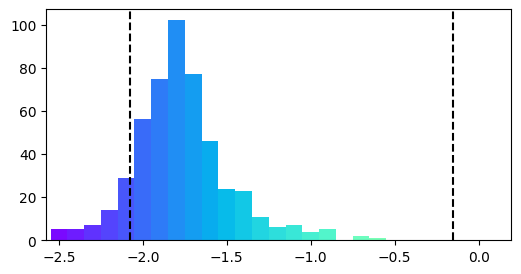

In [ ]:
# Fig. S2C
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
gene = "EIF1AX"
sns.reset_defaults()

ch_cp = chronos.merge(cp, left_index=True, right_index=True)
hist_values, bin_edges = np.histogram(ch_cp[ch_cp['EIF1AY_cp'] < 0.2][gene], bins=40, range=(-2.5, 1.5))
#hist_values, bin_edges = np.histogram(ch_cp[ch_cp['EIF1AY_cp'] >= 0.2][gene], bins=40, range=(-2.5, 1.5))

norm = plt.Normalize(-2.5, 1.5)
cmap = cm.rainbow
plt.figure(figsize=(6, 3))
for i in range(len(bin_edges) - 1):
    plt.bar(
        bin_edges[i],  # xの位置
        hist_values[i],  # 高さ
        width=bin_edges[i + 1] - bin_edges[i],  # ビン幅
        color=cmap(norm((bin_edges[i] + bin_edges[i + 1]) / 2))  # 色付け
    )
lower_5th = np.percentile(chronos[gene], 5)
upper_95th = np.percentile(chronos[gene], 95)
plt.axvline(lower_5th, color="black", linestyle="--")
plt.axvline(upper_95th, color="black", linestyle="--")
plt.xlim((min(chronos[gene]),max(chronos[gene])))
plt.show()


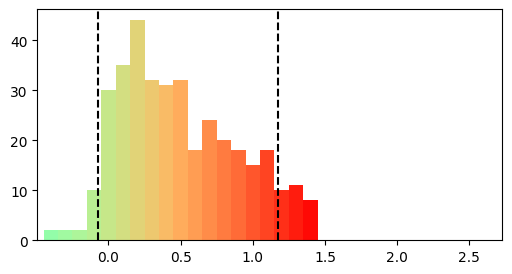

In [14]:
# Fig. S2D
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
gene = "TP53"
sns.reset_defaults()

ch_mut = chronos.merge(mut, left_index=True, right_index=True)
hist_values, bin_edges = np.histogram(ch_mut[ch_mut['TP53_mut'] == 0][gene], bins=40, range=(-2.5, 1.5))
#hist_values, bin_edges = np.histogram(ch_mut[ch_mut['TP53_mut'] > 0][gene], bins=40, range=(-2.5, 1.5))

norm = plt.Normalize(-2.5, 1.5)
cmap = cm.rainbow
plt.figure(figsize=(6, 3))
for i in range(len(bin_edges) - 1):
    plt.bar(
        bin_edges[i],  # xの位置
        hist_values[i],  # 高さ
        width=bin_edges[i + 1] - bin_edges[i],  # ビン幅
        color=cmap(norm((bin_edges[i] + bin_edges[i + 1]) / 2))  # 色付け
    )
lower_5th = np.percentile(chronos[gene], 5)
upper_95th = np.percentile(chronos[gene], 95)
plt.axvline(lower_5th, color="black", linestyle="--")
plt.axvline(upper_95th, color="black", linestyle="--")
plt.xlim((min(chronos[gene]),max(chronos[gene])))
plt.show()


## Selectivity (Figs. 1c, 1d, s1a-e)

In [15]:
#Shimada et al., 2021 https://elifesciences.org/articles/57116
#Calculating Selectivity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
np.random.seed(42)
percentile = 5
rank = 100

X1 = percentile / 100
X2 = 1 - X1

D_G_X005,E_G_X005,E_G_X050,E_G_X095 = {},{},{},{}

# Calculate the 5th and 95th percentiles for each gene
for x in tqdm(chronos.columns):
    sorted_values = sorted(chronos[x])
    E_G_X005[x] = sorted_values[max(0, int(X1 * len(chronos.index)) - 1)]
    E_G_X095[x] = sorted_values[max(0, int(X2 * len(chronos.index)) - 1)]
    E_G_X050[x] = np.median(sorted_values)
    D_G_X005[x] = E_G_X005[x] - E_G_X095[x]

# Convert values to lists for spline fitting
X = np.array(list(E_G_X005.values()))
Y = np.array(list(E_G_X095.values()))

#Spline
# Sort X and Y based on X for spline fitting
sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
Y_sorted = Y[sorted_indices]

# Use UnivariateSpline for a smoother fit
spline = UnivariateSpline(X_sorted, Y_sorted)
spline.set_smoothing_factor(150)  # Adjust this smoothing factor as needed

# Calculate Selectivity with the smoothed spline
sel = pd.DataFrame(index=["selectivity"], columns=chronos.columns)
for x in tqdm(sel.columns):
    sel[x] = (E_G_X095[x] - spline(E_G_X005[x])) / (spline(E_G_X005[x]) - E_G_X005[x])
selT = sel.T
selT['E005'] =  E_G_X005.values()

100%|██████████| 17386/17386 [00:04<00:00, 4085.87it/s]


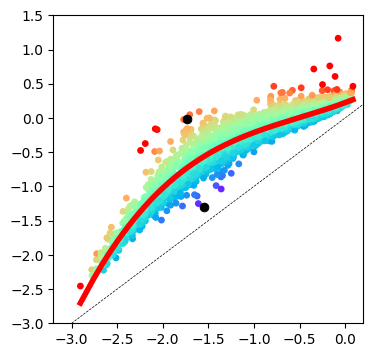

In [17]:
# Fig. 1c
plt.figure(figsize=(4, 4))
plt.scatter(X, Y, s=15,cmap="rainbow",vmax=1, c=selT["selectivity"])

genels = ["CCND1", "H2AC15"]
for g in genels:
    plt.scatter(E_G_X005[g], E_G_X095[g], color="black", s=40, ec="black", linewidth=0.6)
plt.plot(X_sorted, spline(X_sorted), color='red', lw=4)
plt.axline((0, 0), (0.1, 0.1), color="black", lw=0.5, ls="--")
plt.xlim((-3.2,0.2))
plt.ylim((-3,1.5))
plt.show()

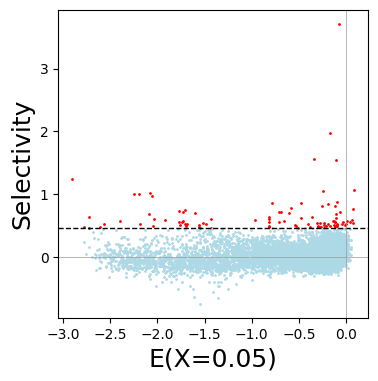

In [18]:
#Fig. S1d
threshold = sorted(selT['selectivity'],reverse=True)[100]
plt.figure(figsize=(4, 4))
plt.scatter(selT[selT["selectivity"] > threshold]["E005"],
            selT[selT["selectivity"] > threshold]["selectivity"], s=1, color="red")
plt.scatter(selT[selT["selectivity"] <= threshold]["E005"],
            selT[selT["selectivity"] <= threshold]["selectivity"], s=1, color="lightblue")

plt.xlabel(f"E(X=0.05)", fontsize=18)
plt.ylabel("Selectivity", fontsize=18)
plt.axline((0, threshold), (-1, threshold), color="black", lw=1, ls="--")
plt.axline((0, 0), (-1, 0), color="0.6", lw=0.5, ls="-")
plt.axline((0, 0), (0, 1), color="0.6", lw=0.5, ls="-")
plt.show()


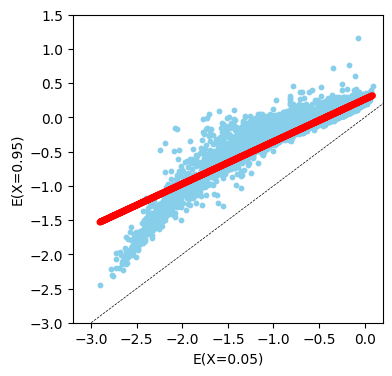

In [19]:
#Fig. s1a Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), Y)

plt.figure(figsize=(4,4))
plt.scatter(E_G_X005.values(),E_G_X095.values(),s=10, color="skyblue")
plt.plot(X, lr.predict(X.reshape(-1, 1)), color = 'red',lw=5)
plt.axline((0,0),(0.1,0.1),color="black",lw=0.5,ls="--")
plt.xlim((-3.2,0.2))
plt.ylim((-3,1.5))
plt.xlabel("E(X="+str(X1)+")")
plt.ylabel("E(X="+str(X2)+")")
plt.show()


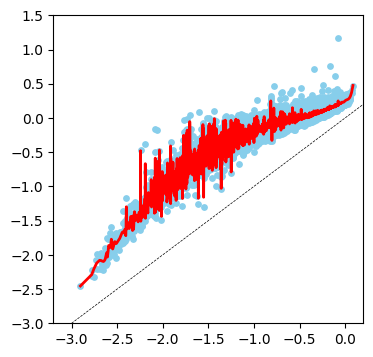

In [27]:
# Fig. S2b
#Spline
# Sort X and Y based on X for spline fitting
sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
Y_sorted = Y[sorted_indices]

plt.figure(figsize=(4,4))
# Use UnivariateSpline for a smoother fit
spline = UnivariateSpline(X_sorted, Y_sorted)
spline.set_smoothing_factor(50)  # Adjust this smoothing factor as needed

plt.scatter(X, Y, s=15,  color='skyblue')

plt.plot(X_sorted, spline(X_sorted), color='red', lw=2)
plt.axline((0, 0), (0.1, 0.1), color="black", lw=0.5, ls="--")
plt.xlim((-3.2,0.2))
plt.ylim((-3,1.5))
plt.show()

In [28]:
#Fig. 2c
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import numpy as np

smoothing = [50, 100, 150]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rss(predict):
    rss = []
    for tr, te in kf.split(X_sorted):
        Xtr, Xte = X_sorted[tr].ravel(), X_sorted[te].ravel()
        Ytr, Yte = Y_sorted[tr].ravel(), Y_sorted[te].ravel()
        Yp = predict(Xtr, Ytr, Xte)
        rss.append(np.sum((Yte - Yp) ** 2))
    return np.mean(rss)

mean_rss_scores = {
    **{f"spline_{s}": cv_rss(lambda Xtr, Ytr, Xte, s=s: UnivariateSpline(Xtr, Ytr, s=s)(Xte))
       for s in smoothing},
    "linear": cv_rss(lambda Xtr, Ytr, Xte:
                     LinearRegression().fit(Xtr[:, None], Ytr).predict(Xte[:, None]))
}

print(mean_rss_scores)


{'spline_50': 20.58269398171995, 'spline_100': 16.64090928606306, 'spline_150': 16.64090928606306, 'linear': 34.0022526159565}


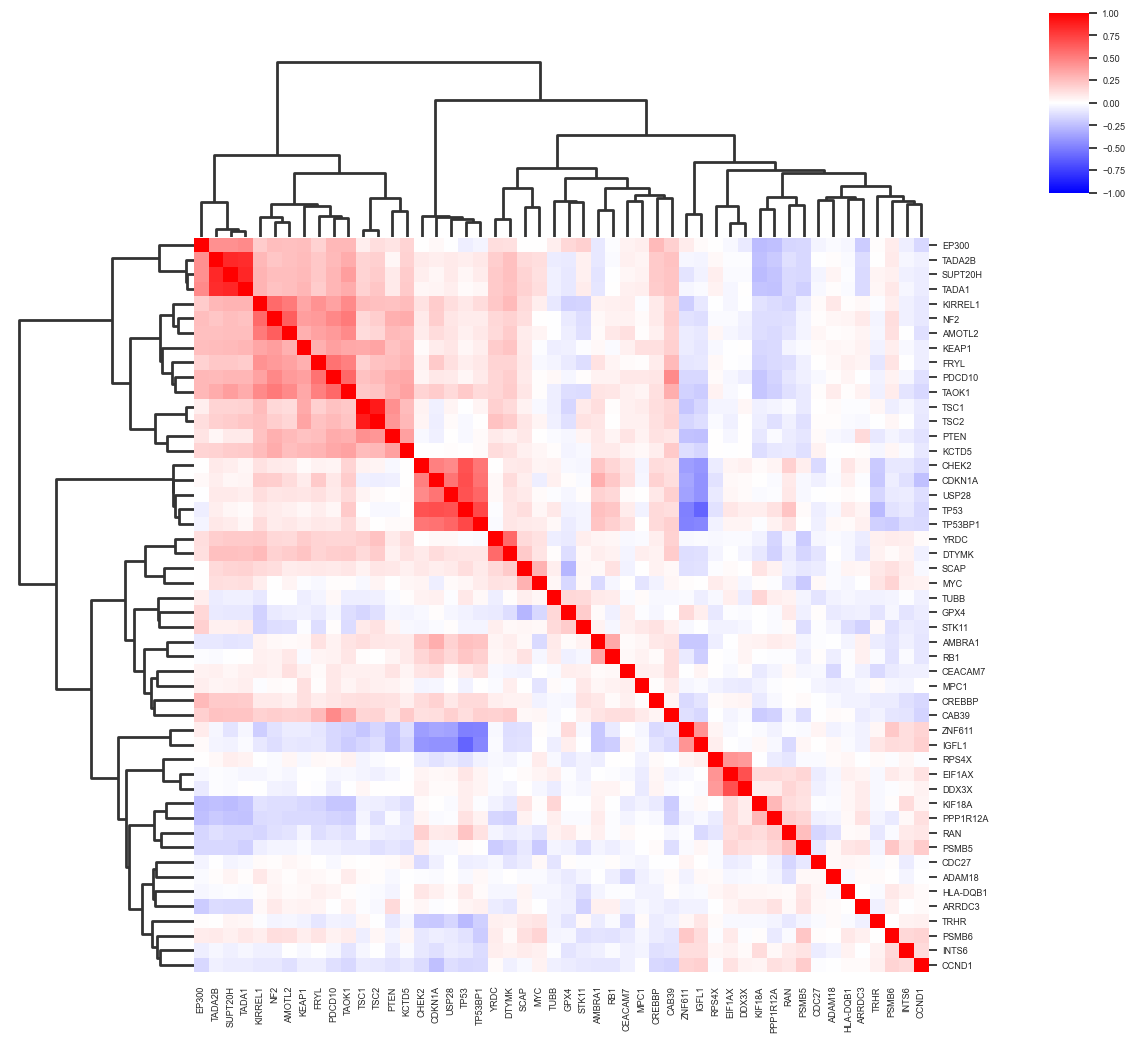

In [ ]:
#Fig. 1d, S2b
import seaborn as sns
genes = selT.sort_values('selectivity',ascending=False)[:50].index
corr = chronos[genes].corr()
sns.set(font_scale= 0.6)
g = sns.clustermap(corr, cmap="bwr",vmax=1,vmin=-1, method = "ward",
               cbar_pos=(1.05, 0.85, 0.04, 0.18),
               tree_kws=dict(linewidths=2),figsize=(10,10),
               yticklabels=genes, xticklabels=genes)

plt.show()

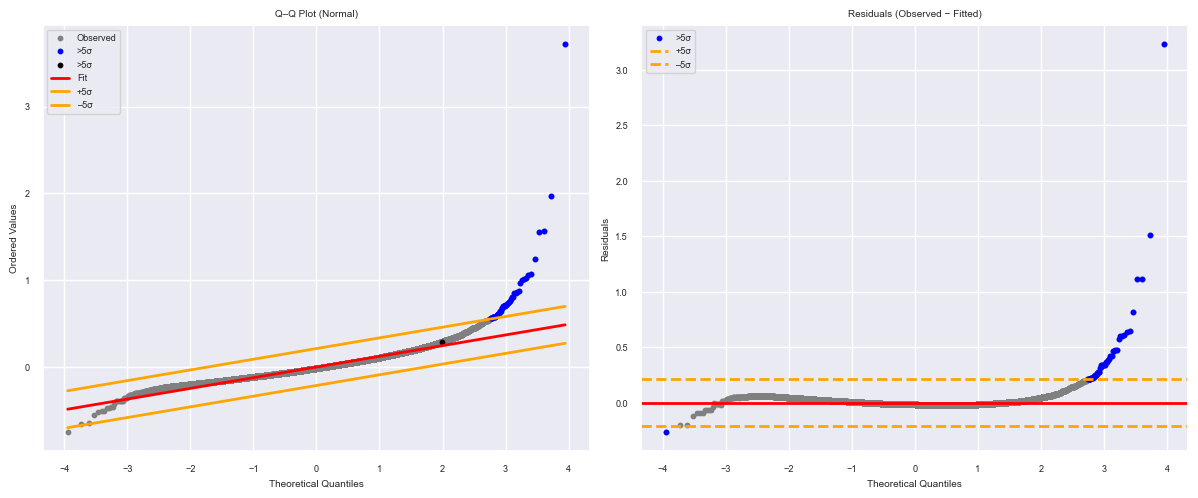

In [ ]:
#Figure S1e
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Generate Q-Q data and regression info
(osm, osr), (slope, intercept, r) = stats.probplot(selT.selectivity, dist="norm")

# Predicted (fitted) values
fitted = slope * osm + intercept

# Residuals
residuals = osr - fitted

# Compute standard deviation of residuals
sigma = np.std(residuals)

# Plot QQ + residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# === Q–Q plot ===
axes[0].scatter(osm, osr, s=10, color='gray', label="Observed")

axes[0].scatter(osm[-50:],  # highlight >5σ points
                osr[-50:],
                s=10, color='blue', label='>5σ')

axes[0].scatter(osm[-400],  # highlight >5σ points
                osr[-400],
                s=10, color='black', label='>5σ')               

axes[0].plot(osm, fitted, color='red', lw=2, label="Fit")

# Add ±5σ lines (vertical shift from fitted line)
axes[0].plot(osm, fitted + 5 * sigma, color='orange',  lw=2, label='+5σ')
axes[0].plot(osm, fitted - 5 * sigma, color='orange', lw=2, label='–5σ')

axes[0].set_title("Q–Q Plot (Normal)")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Ordered Values")
axes[0].legend()

# === Residuals plot ===
axes[1].scatter(osm, residuals, s=10, color='gray')
axes[1].scatter(osm[np.abs(residuals) > 5 * sigma],  # highlight >5σ points
                residuals[np.abs(residuals) > 5 * sigma],
                s=10, color='blue', label='>5σ')

axes[1].axhline(0, color='red', lw=2)
axes[1].axhline(5 * sigma, color='orange', ls='--', lw=2, label='+5σ')
axes[1].axhline(-5 * sigma, color='orange', ls='--', lw=2, label='–5σ')

axes[1].set_title("Residuals (Observed − Fitted)")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Residuals")
axes[1].legend()

plt.savefig("../result/QQ_residuals_selectivity.svg")
plt.tight_layout()
plt.show()
